In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn")

# Fetch PES Points 

In [2]:
path = "../TaskC/pes.tab"

r = []
E_HF = []
E_CCSDT = []

with open(path, "r") as f:
    for line in f:
        try:
            splits = list(map(float, line.split()))

            r.append(splits[0])
            E_HF.append(splits[1])
            E_CCSDT.append(splits[2])
        except:
            pass
        
#r = np.asarray(r)
E_HF = np.asarray(E_HF)
E_CCSDT = np.asarray(E_CCSDT)

# Display PES 

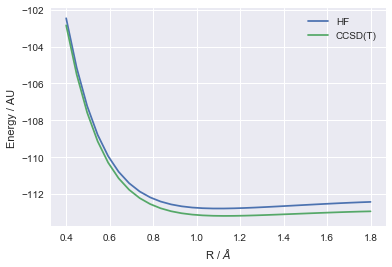

In [3]:
plt.plot(r, E_HF, label="HF")
plt.plot(r, E_CCSDT, label="CCSD(T)")

plt.xlabel("R / $\AA$")
plt.ylabel("Energy / AU")

plt.legend()

# Make Hamiltonian 

In [4]:
N = len(r)

In [5]:
from scipy.constants import physical_constants

# TODO units should be in AU!!
u = physical_constants["atomic mass constant"][0]

m_C = 12 * u
m_O = 16 * u

## Kinetic Term

In [6]:
from scipy.constants import hbar

mu = m_C * m_O / (m_C + m_O)

P = hbar**2 / (2 * mu) * (
    np.diag(2 * np.ones(N)) + \
    np.diag(-1 * np.ones(N-1), -1) + \
    np.diag(-1 * np.ones(N-1), +1)
)
    

## Potential Term 

In [7]:
U_HF = np.diag(E_HF)
U_CCSDT = np.diag(E_CCSDT)

## H = P + U 

In [8]:
H_HF = P + U_HF
H_CCSDT = P + U_CCSDT

#  Solve Finite Differences Equations


Eigenvalueproblem: $\hat{H} |\psi\rangle = E |\psi\rangle$

Finite differences: $\psi = \{\psi_1, \psi_2, \ldots, \psi_n\}$

## HF 

In [9]:
E, psi = np.linalg.eigh(H_HF)

In [10]:
print(E)

[-112.7897833 -112.7891021 -112.7794602 -112.7731646 -112.7613337
 -112.7378148 -112.7363152 -112.710719  -112.6814123 -112.6710166
 -112.6509219 -112.620022  -112.5893026 -112.5672012 -112.559227
 -112.530183  -112.5025331 -112.4766579 -112.4529701 -112.431844
 -112.4113859 -112.1854613 -111.8650383 -111.4172164 -110.7976877
 -109.9472908 -108.7886199 -107.2245782 -105.1445829 -102.4607974]


## CCSD(T) 

In [11]:
E, psi = np.linalg.eigh(H_CCSDT)

In [12]:
print(E)

[-113.1923723 -113.1892052 -113.1848325 -113.1785083 -113.1626656
 -113.1623561 -113.1434601 -113.1222183 -113.1193108 -113.0999189
 -113.0772766 -113.0548083 -113.0481871 -113.0328901 -113.0118097
 -112.9918366 -112.9733303 -112.9568885 -112.9433636 -112.9389524
 -112.7781714 -112.5478023 -112.2235534 -111.7726656 -111.1510415
 -110.299849  -109.142235  -107.5821021 -105.5110634 -102.8445797]
